In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import HillClimbSearch, TreeSearch, K2Score, BicScore, BDeuScore
import tqdm

In [48]:
data = pd.read_csv('classified_pm25_by_station.csv')
stations = data.iloc[:, 4:]

In [45]:
stations = stations.fillna(0)

In [46]:
est = TreeSearch(stations, root_node='Dingling')
model = est.estimate(estimator_type='chow-liu')

/opt/anaconda3/envs/cs274/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/anaconda3/envs/cs274/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/anaconda3/envs/cs274/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/anaconda3/envs/cs274/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous valu

In [53]:
est = HillClimbSearch(stations)
best_model = est.estimate(scoring_method=K2Score(stations), max_iter= 1e4)

  0%|          | 35/10000 [00:02<13:09, 12.62it/s]


In [58]:
model = BayesianNetwork(best_model.edges())

In [ ]:
model.fit()

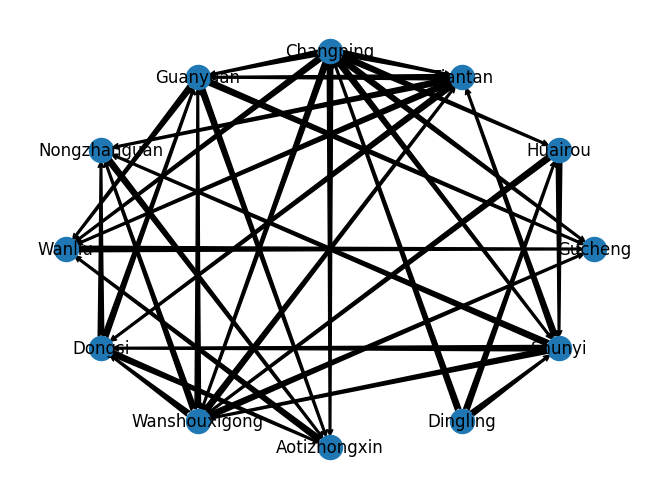

In [54]:
import networkx as nx
nx.draw_circular(best_model, with_labels = True, arrowstyle = 'fancy')